In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../scripts/')

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from data_cleaner import DataCleaner
%matplotlib inline

In [66]:
root_dir = Path().cwd().parent
data_dir = root_dir / "data"

In [118]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (20, 10)

In [67]:
df = pd.read_csv(data_dir / "data.csv")

In [68]:
df.drop(columns="Unnamed: 32", axis=1, inplace=True)

In [69]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [70]:
df.shape

(569, 32)

In [71]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
352,899987,M,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.191300,...,33.13,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.363500,0.168900,...,36.04,31.37,251.20,4254.0,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427
361,901041,B,13.30,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,...,14.20,29.20,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,0.06658
294,891716,B,12.72,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,...,13.50,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
232,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307


In [72]:
df_copy = df.copy()

In [76]:
data_cleaner = DataCleaner()

## Check Missing Values

In [77]:
data_cleaner.missing_percentage(df_copy)

,column_name,percent_missing
0,id,0.0
1,diagnosis,0.0
2,radius_mean,0.0
3,texture_mean,0.0
4,perimeter_mean,0.0
5,area_mean,0.0
6,smoothness_mean,0.0
7,compactness_mean,0.0
8,concavity_mean,0.0
9,concave points_mean,0.0


## Check Duplicates

In [78]:
data_cleaner.check_number_of_duplicates(df_copy)

0

## Treating Outliers

<AxesSubplot:xlabel='radius_mean'>

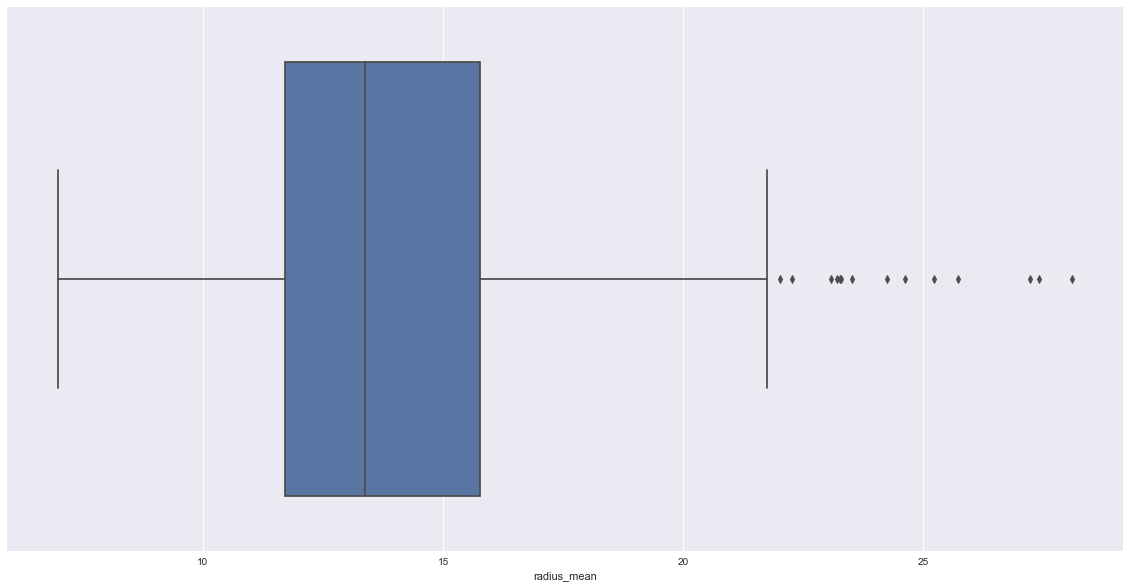

In [119]:
sns.boxplot(x=df_copy["radius_mean"])

In [100]:
outlier_treated_df = data_cleaner.remove_outliers(df_copy.iloc[:, 2:])

<AxesSubplot:xlabel='radius_mean'>

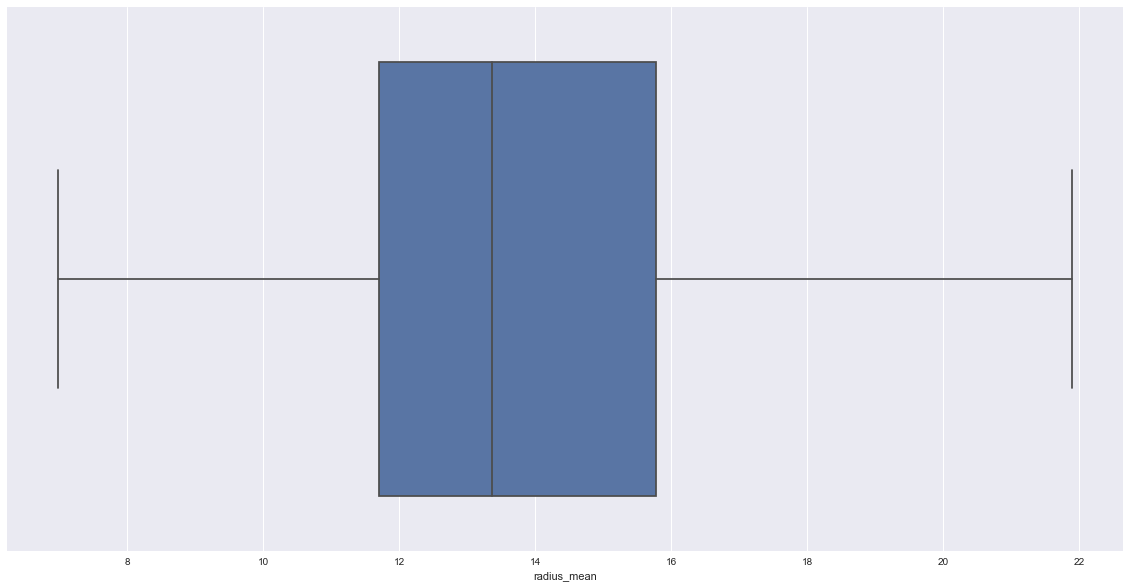

In [120]:
sns.boxplot(x=outlier_treated_df["radius_mean"])

In [106]:
clean_df = pd.concat([df_copy.iloc[:, :2], outlier_treated_df], axis=1)

In [108]:
clean_df.to_csv(data_dir / "data_clean.csv", index=False)